In [15]:
# Module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats # 확률분포 그래프
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [5]:
# train data를 불러오자
train = pd.read_csv('./data/bike-sharing-demand/train.csv', parse_dates=['datetime']) # datetime 컬럼을 날짜화 시킨다.
train.head() # windspeed가 0인 데이터는 측정을 안했다고 판단 할 수 있다.

# test data를 불러오자
test = pd.read_csv('./data/bike-sharing-demand/test.csv', parse_dates=['datetime']) # datetime 컬럼을 날짜화 시킨다.
test.head() # windspeed가 0인 데이터는 측정을 안했다고 판단 할 수 있다.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.shape

(10886, 12)

In [7]:
test.shape

(6493, 9)

In [8]:
# Feature 구성
# datetime data를 분할하여 train data에 추가
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
print(train.shape) # 컬럼이 추가 됨
print(train.info())

# Feature 구성
# datetime data를 분할하여 train data에 추가
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
print(test.shape) # 컬럼이 추가 됨
print(test.info())

(10886, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 1.6 MB
None
(6493, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
dateti

In [9]:
# 연속형 Feature와 범주형 Feature 구분
# 연속형 Feature : temp, humidity, windspeed, atemp
# 범주형 Feature : season, holiday, workingday, weather, dayofweek, month, year, hour
# 범주형 Feature는 Category로 변경 시켜주어야 한다.
categorical_feature_name = \
['season','holiday','workingday','weather','dayofweek','month','year','hour']

for i in categorical_feature_name:
    train[i] = train[i].astype('category')

In [10]:
# 필요한 Feature 구성
feature_name = \
['season','weather','temp','humidity','year','hour','dayofweek','holiday','workingday']

In [11]:
X_train = train[feature_name]
print(X_train.shape)
X_train.tail()

(10886, 9)


,season,weather,temp,humidity,year,hour,dayofweek,holiday,workingday
10881,4,1,15.58,50,2012,19,2,0,1
10882,4,1,14.76,57,2012,20,2,0,1
10883,4,1,13.94,61,2012,21,2,0,1
10884,4,1,13.94,61,2012,22,2,0,1
10885,4,1,13.12,66,2012,23,2,0,1


In [12]:
Y_train = train['count']
print(Y_train.shape)
Y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [13]:
X_test = test[feature_name]
print(X_test.shape)
X_test.head()

(6493, 9)


,season,weather,temp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,56,2011,0,3,0,1
1,1,1,10.66,56,2011,1,3,0,1
2,1,1,10.66,56,2011,2,3,0,1
3,1,1,10.66,56,2011,3,3,0,1
4,1,1,10.66,56,2011,4,3,0,1


In [16]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state = 0) # 트리 100개를 쓰겠다, -1은 100개 돌동안 무한 반복 하겠다. 
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
# Training
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
# 예측
pre = model.predict(X_test)
print(pre.shape)
pre[0:10]

(6493,)


array([ 11.26      ,   3.93666667,   4.78      ,   3.77      ,
         3.11      ,   6.11      ,  42.98833333, 111.41      ,
       250.182     , 135.69      ])

[Text(0.5, 1.0, 'Test')]

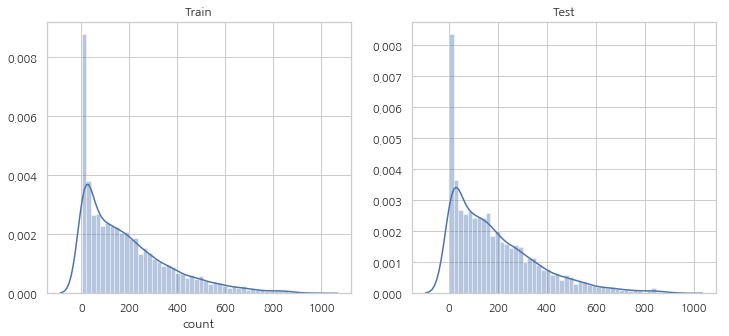

In [19]:
# 예측한 데이터를 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(Y_train, ax = ax1, bins=50) # 50개정도로 나눔
ax1.set(title = 'Train')
sns.distplot(pre, ax = ax2, bins = 50)
ax2.set(title = 'Test')

## 두 그래프의 차이가 심하면 적용모델이 틀린 것이다.

In [20]:
submission = pd.read_csv("./data/bike-sharing-demand/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [21]:
submission['count'] = pre
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.260000
1,2011-01-20 01:00:00,3.936667
2,2011-01-20 02:00:00,4.780000
3,2011-01-20 03:00:00,3.770000
4,2011-01-20 04:00:00,3.110000


In [22]:
submission.to_csv('./data/bike-sharing-demand/score-08.csv', index=False)

# 적용해본 방식 정리하기

In [ ]:
- Feature 에서 windspeed 제거
- 사용한 Feature 구성
feature_name = \
['season','weather','temp','humidity','year','hour','dayofweek','holiday','workingday']

- RandomForestRegressor 예측
점수  0.41889